In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('processed_data.csv')

cutoff_year = 2015

train_data = data[data['year'] <= cutoff_year].copy()
test_data  = data[data['year'] >  cutoff_year].copy()

X_train = train_data.drop(columns=['target_dnf'])
y_train = train_data['target_dnf']

X_test  = test_data.drop(columns=['target_dnf'])
y_test  = test_data['target_dnf']

print("Training size (X, y):", X_train.shape, ",", len(y_train))
print("Test size (X, y):", X_test.shape, ",", len(y_test))

Training size (X, y): (8550, 35) , 8550
Test size (X, y): (1450, 35) , 1450


# Random Forest #

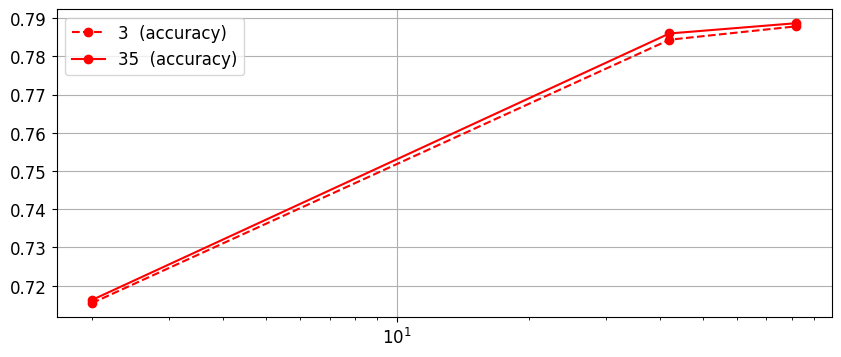

In [40]:
from sklearn.ensemble import RandomForestClassifier
from utils import hypersolve

rng_seed = 42

param_grid_rf = {
    'model__max_features' : [3, X_train.shape[1]],
    'model__n_estimators' : [2,42,82]
}

model = RandomForestClassifier(random_state=rng_seed)

result_rf = hypersolve(model, param_grid_rf, X_train, y_train)